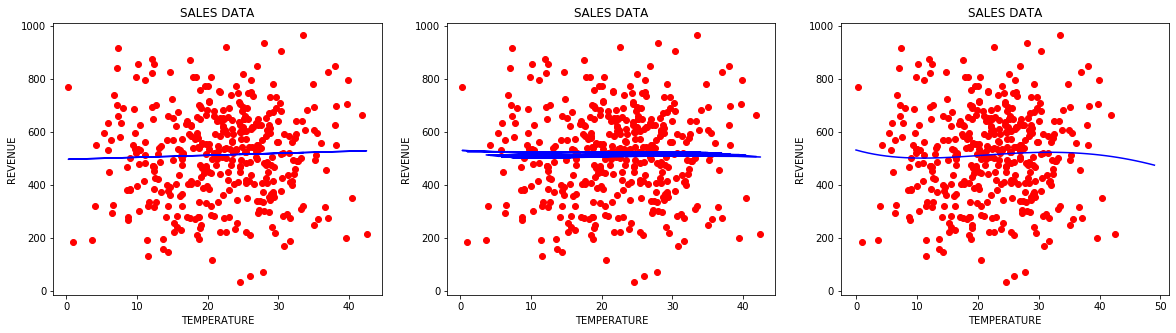

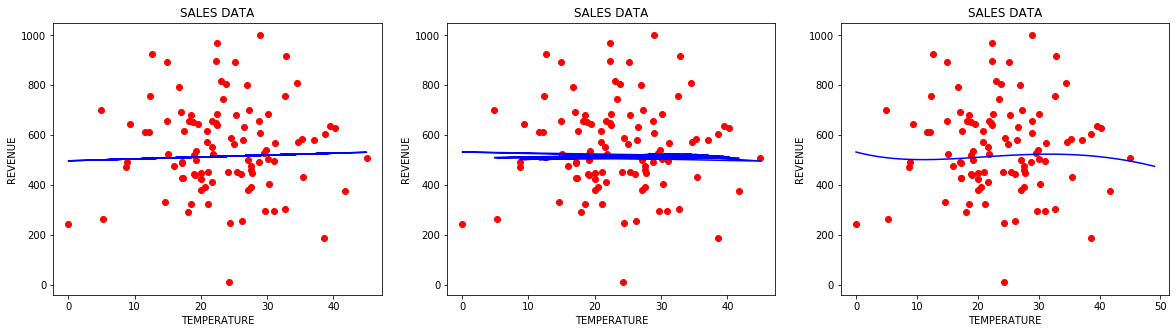


R2 Score Train =  0.0012455264892812234
R2 Score Test =  -0.041502859379837664
RMSE Train =  172.73130699079366
RMSE Test =  185.11078026484222


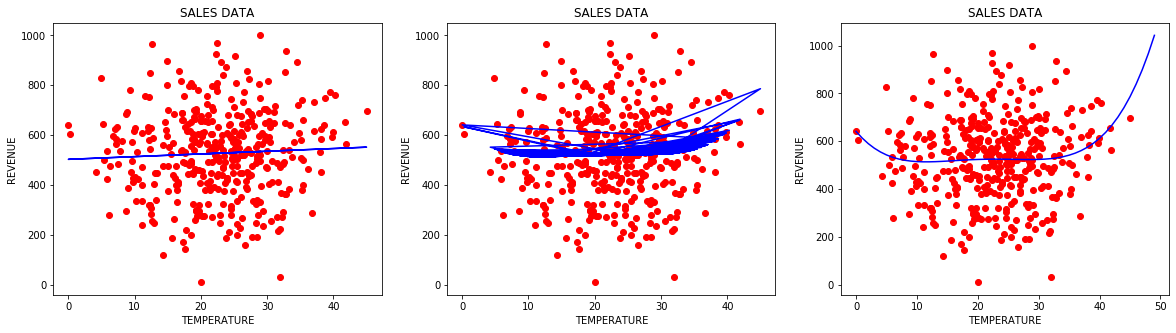

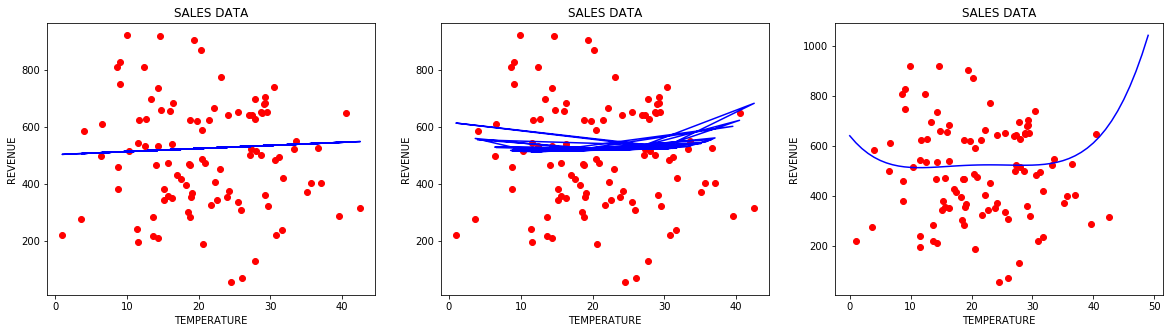


R2 Score Train =  0.002494888702544329
R2 Score Test =  -0.03470537057679013
RMSE Train =  170.33344682733915
RMSE Test =  194.2073759105703


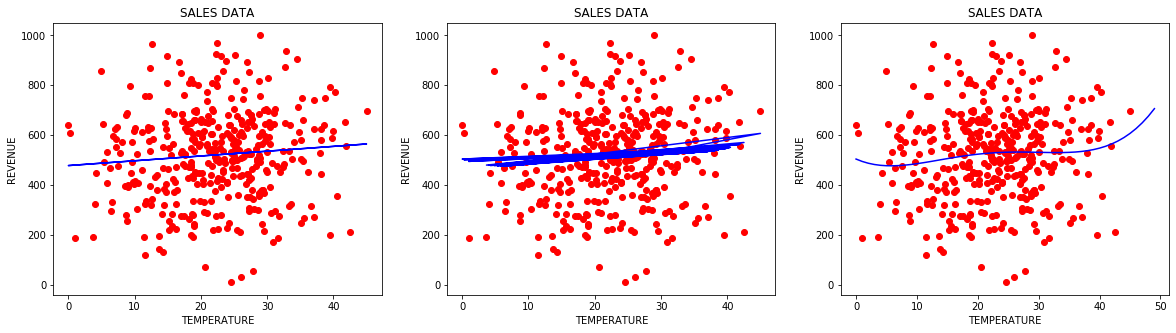

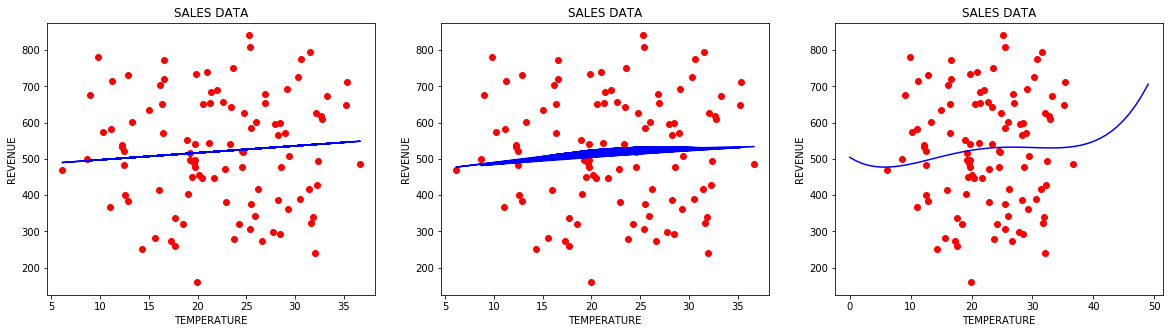


R2 Score Train =  0.007901788942402344
R2 Score Test =  -0.007401121586702031
RMSE Train =  179.08682264027857
RMSE Test =  156.1651535833664


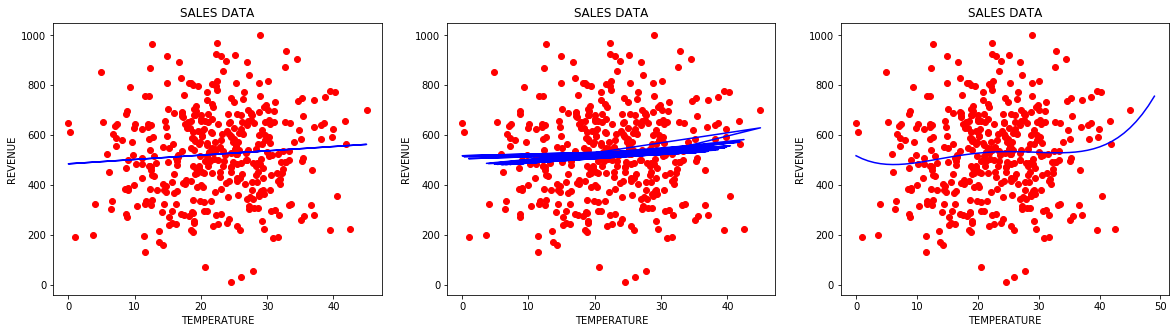

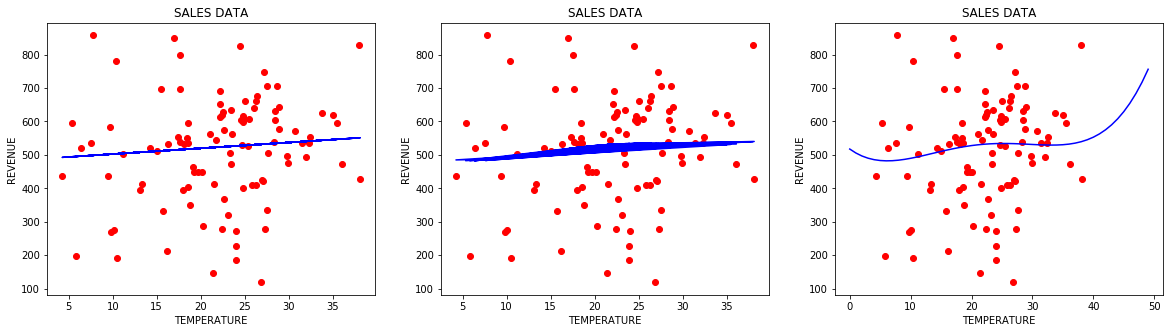


R2 Score Train =  0.006324313747070098
R2 Score Test =  0.013601417105135183
RMSE Train =  178.40865480356015
RMSE Test =  157.93940652372282


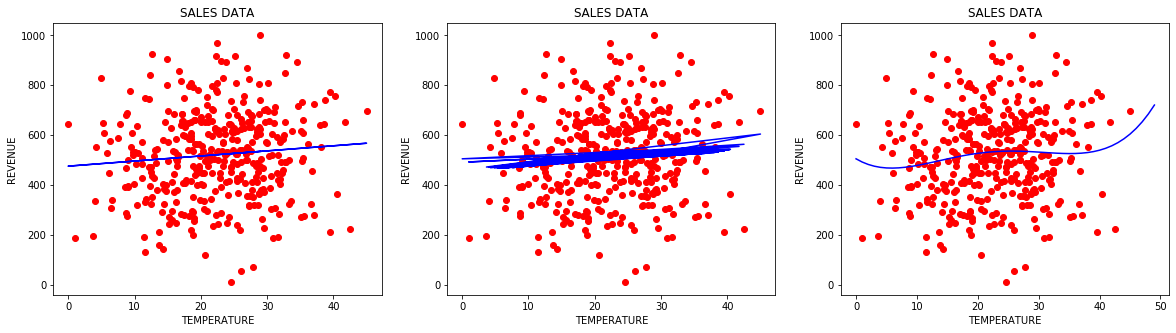

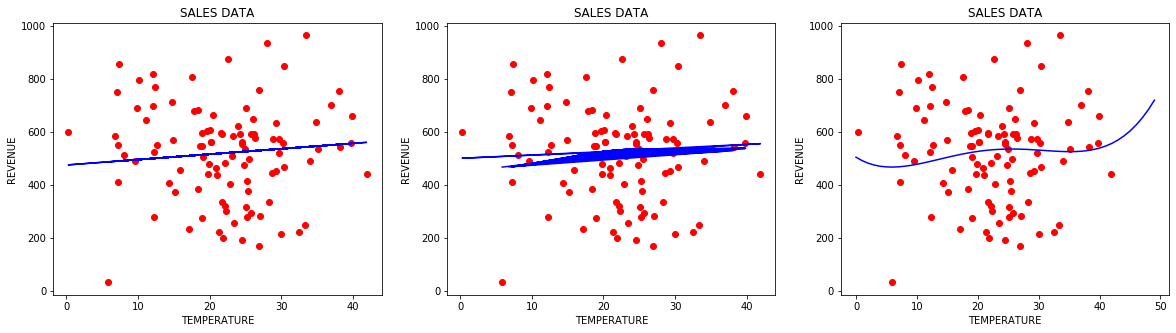


R2 Score Train =  0.008830476492702521
R2 Score Test =  -0.01621415130288706
RMSE Train =  172.7495582348412
RMSE Test =  183.3819279136961

					R2 Train Mean =  0.0053593988748001035
					R2 Test Mean =  -0.01724441714821634
					RMSE Train Mean =  174.66195789936253
					RMSE Test Mean =  175.36092883923956


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

r2_train_mean, r2_test_mean, rmse_train_mean, rmse_test_mean = 0, 0, 0, 0

train = ["SalesData_Train01.csv", "SalesData_Train02.csv", "SalesData_Train03.csv", "SalesData_Train04.csv", "SalesData_Train05.csv",]
test = ["SalesData_Test01.csv", "SalesData_Test02.csv", "SalesData_Test03.csv", "SalesData_Test04.csv", "SalesData_Test05.csv"]
for i in range(0, 5):
    train_set = pd.read_csv(train[i])
    test_set = pd.read_csv(test[i])
        
    X_train = np.sort(np.array(train_set.iloc[:, 1:-1].values))
    y_train = np.sort(np.array(train_set.iloc[:, -1].values))

    X_test = np.sort(np.array(test_set.iloc[:, 1:-1].values))
    y_test = np.sort(np.array(test_set.iloc[:, -1].values))
    
    poly_transform = PolynomialFeatures(degree=4)
    X_train_poly = poly_transform.fit_transform(X_train)
    X_test_poly = poly_transform.fit_transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    poly_lin_reg = LinearRegression()
    poly_lin_reg.fit(X_train_poly, y_train)

    y_train_pred = lin_reg.predict(X_train)

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.scatter(X_train, y_train, color = "red")
    plt.plot(X_train, y_train_pred, color = "blue")
    plt.title("SALES DATA")
    plt.xlabel("TEMPERATURE")
    plt.ylabel("REVENUE")

    y_poly_train_pred = poly_lin_reg.predict(X_train_poly)
    plt.subplot(1,3,2)
    plt.scatter(X_train, y_train, color = "red")
    plt.plot(X_train, y_poly_train_pred, color = "blue")
    plt.title("SALES DATA")
    plt.xlabel("TEMPERATURE")
    plt.ylabel("REVENUE")

    X_dummy = np.arange(0, 50, 1).reshape(-1,1)
    X_dummy_poly = poly_transform.transform(X_dummy)
    Y_dummy_poly_pred = poly_lin_reg.predict(X_dummy_poly)

    plt.subplot(1,3,3)
    plt.scatter(X_train, y_train, color = "red")
    plt.plot(X_dummy, Y_dummy_poly_pred, color = "blue")
    plt.title("SALES DATA")
    plt.xlabel("TEMPERATURE")
    plt.ylabel("REVENUE")
    plt.show()
    
    y_test_pred = lin_reg.predict(X_test)

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.scatter(X_test, y_test, color = "red")
    plt.plot(X_test, y_test_pred, color = "blue")
    plt.title("SALES DATA")
    plt.xlabel("TEMPERATURE")
    plt.ylabel("REVENUE")

    y_poly_test_pred = poly_lin_reg.predict(X_test_poly)

    plt.subplot(1,3,2)
    plt.scatter(X_test, y_test, color = "red")
    plt.plot(X_test, y_poly_test_pred, color = "blue")
    plt.title("SALES DATA")
    plt.xlabel("TEMPERATURE")
    plt.ylabel("REVENUE")

    X_dummy_test = np.arange(0, 50, 1).reshape(-1,1)
    X_dummy_test_poly = poly_transform.transform(X_dummy_test)
    Y_dummy_test_poly_pred = poly_lin_reg.predict(X_dummy_test_poly)

    plt.subplot(1,3,3)
    plt.scatter(X_test, y_test, color = "red")
    plt.plot(X_dummy_test, Y_dummy_test_poly_pred, color = "blue")
    plt.title("SALES DATA")
    plt.xlabel("TEMPERATURE")
    plt.ylabel("REVENUE")
    plt.show()
    
    r2_train = lin_reg.score(X_train, y_train)
    r2_test = lin_reg.score(X_test, y_test)
    print("\nR2 Score Train = ",r2_train)
    r2_train_mean = r2_train_mean + r2_train
    print("R2 Score Test = ",r2_test)
    r2_test_mean= r2_test_mean + r2_test

    train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
    print("RMSE Train = ",train_rmse)
    rmse_train_mean = rmse_train_mean + train_rmse
    test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE Test = ",test_rmse)
    rmse_test_mean = rmse_test_mean + test_rmse
    
print("\n\t\t\t\t\tR2 Train Mean = ",r2_train_mean/5)
print("\t\t\t\t\tR2 Test Mean = ",r2_test_mean/5)
print("\t\t\t\t\tRMSE Train Mean = ",rmse_train_mean/5)
print("\t\t\t\t\tRMSE Test Mean = ",rmse_test_mean/5)
    



    